In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

In [206]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [207]:
data1 = data.copy()
data1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [208]:
data2 = data1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [209]:
data3 = data2.rename({"Age_08_04":"Age","Quarterly_Tax":"Q_Tax"}, axis=1)
data3.head()

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [210]:
data3.shape

(1436, 9)

## EDA and Data Visualization

In [211]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Q_Tax   1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [212]:
data3.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Q_Tax     0
Weight    0
dtype: int64

In [213]:
data3[data3.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [214]:
data4 = data3.drop_duplicates()
data4.iloc[110:115, :]

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
112,24950,8,13253,116,2000,5,5,234,1320
114,22950,7,10000,116,2000,5,5,234,1270
115,24990,8,6000,90,2000,5,5,234,1280


In [215]:
data5 = data4.reset_index()
data5.iloc[110:115, :]

,index,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
110,110,31000,4,4000,116,2000,5,5,283,1480
111,111,31275,4,1500,116,2000,5,5,283,1480
112,112,24950,8,13253,116,2000,5,5,234,1320
113,114,22950,7,10000,116,2000,5,5,234,1270
114,115,24990,8,6000,90,2000,5,5,234,1280


In [216]:
data5.shape

(1435, 10)

In [217]:
data6 = data5.drop(["index"], axis=1)
data6.head()

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [218]:
data6.shape

(1435, 9)

In [219]:
data6.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.915679,3608.732978,4350.0,8450.0,9900.0,11950.0,32500.0
Age,1435.0,55.980488,18.563312,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.782578,37491.094553,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.491986,14.981408,69.0,90.0,110.0,110.0,192.0
cc,1435.0,1576.560976,424.387533,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1435.0,4.032753,0.952667,2.0,3.0,4.0,5.0,5.0
Gears,1435.0,5.026481,0.188575,3.0,5.0,5.0,5.0,6.0
Q_Tax,1435.0,87.020209,40.959588,19.0,69.0,85.0,85.0,283.0
Weight,1435.0,1072.287108,52.251882,1000.0,1040.0,1070.0,1085.0,1615.0


## Detecting Outliers

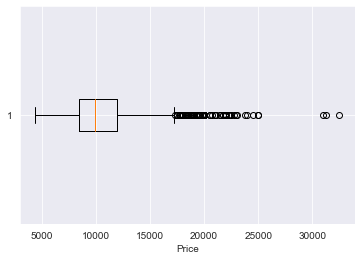

In [220]:
plt.boxplot(data6["Price"], vert=False)
plt.xlabel("Price")
plt.show()

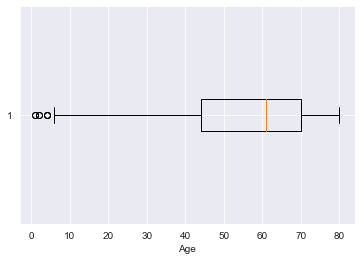

In [221]:
plt.boxplot(data6["Age"], vert=False)
plt.xlabel("Age")
plt.show()

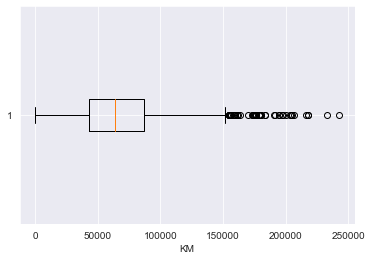

In [222]:
plt.boxplot(data6["KM"], vert=False)
plt.xlabel("KM")
plt.show()

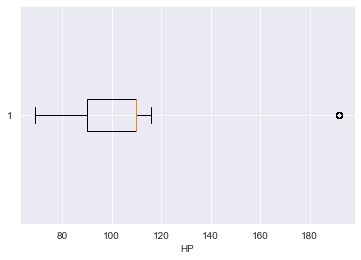

In [223]:
plt.boxplot(data6["HP"], vert=False)
plt.xlabel("HP")
plt.show()

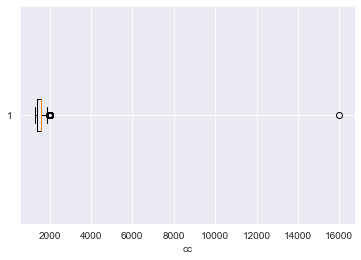

In [224]:
plt.boxplot(data6["cc"], vert=False)
plt.xlabel("cc")
plt.show()

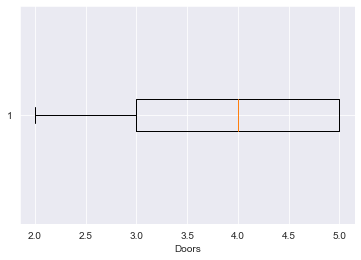

In [225]:
plt.boxplot(data6["Doors"], vert=False)
plt.xlabel("Doors")
plt.show()

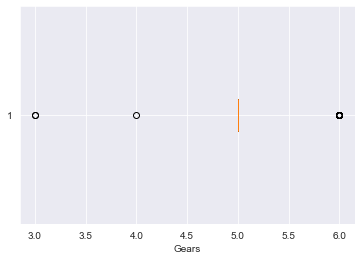

In [226]:
plt.boxplot(data6["Gears"], vert=False)
plt.xlabel("Gears")
plt.show()

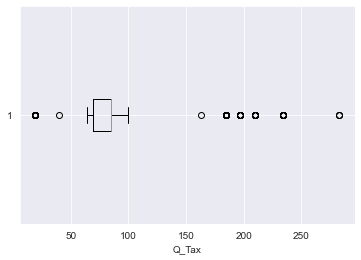

In [227]:
plt.boxplot(data6["Q_Tax"], vert=False)
plt.xlabel("Q_Tax")
plt.show()

Observations :-

From the above all the boxplot we can say that except gear variable all the other variables have outliers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

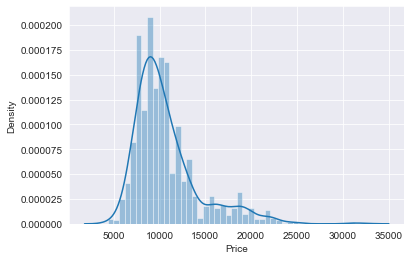

In [228]:
sns.distplot(data6["Price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

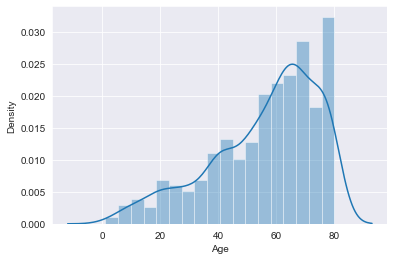

In [229]:
sns.distplot(data6["Age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

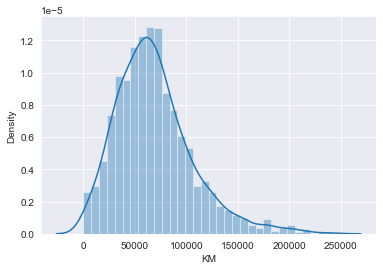

In [230]:
sns.distplot(data6["KM"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

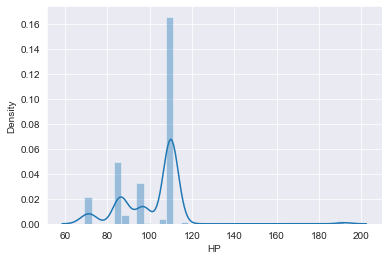

In [231]:
sns.distplot(data6["HP"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

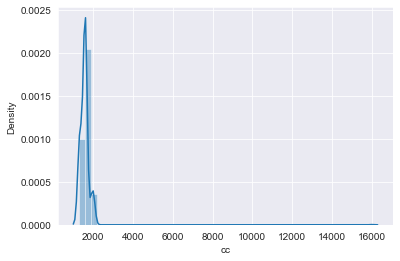

In [232]:
sns.distplot(data6["cc"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

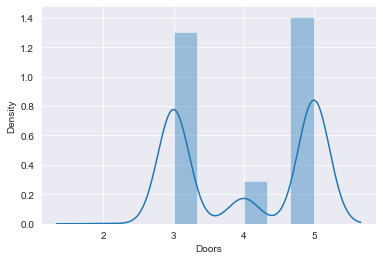

In [233]:
sns.distplot(data6["Doors"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

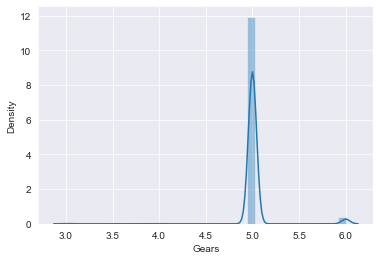

In [234]:
sns.distplot(data6["Gears"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Q_Tax', ylabel='Density'>

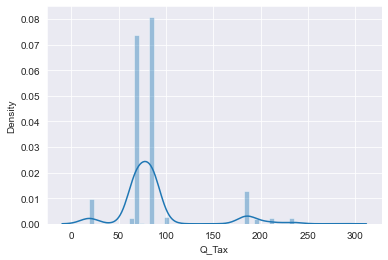

In [235]:
sns.distplot(data6["Q_Tax"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

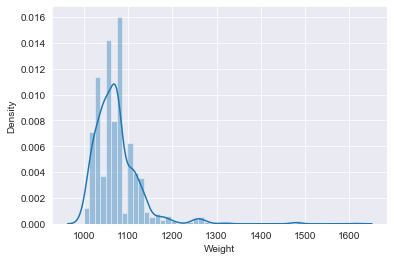

In [236]:
sns.distplot(data6["Weight"])

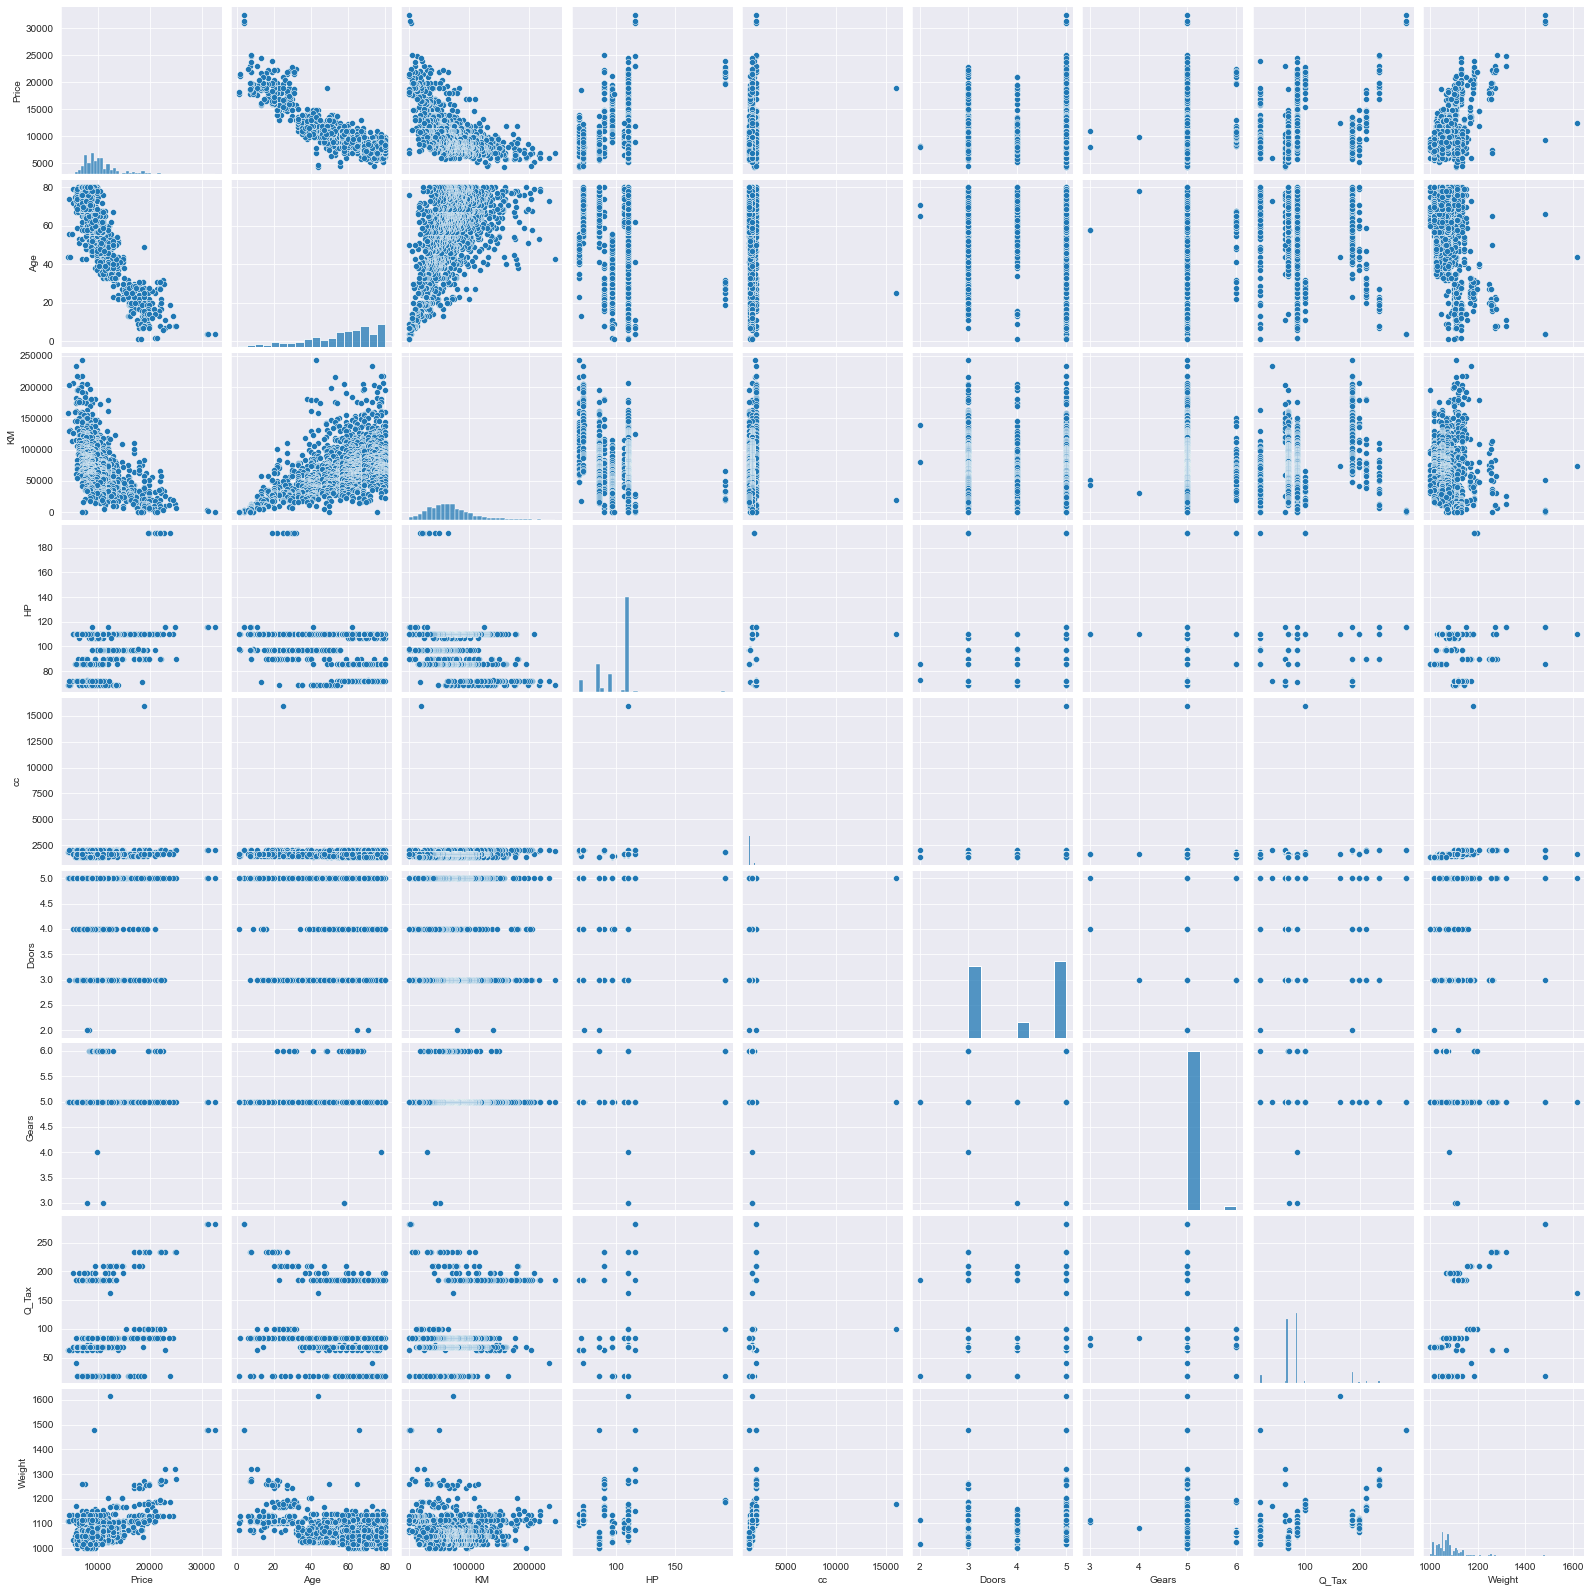

In [237]:
sns.pairplot(data6)

# Correlation Analysis

In [238]:
data6.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Q_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

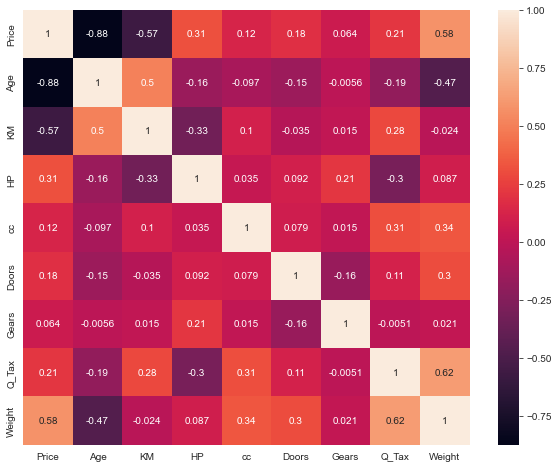

In [239]:
plt.figure(figsize=(10,8))
sns.heatmap(data6.corr(), annot=True, cmap='rocket')

Observations :-

1. There exist a negative correlation between Age and Price with value -0.88.
2. There is a modrate positive correlation between Price and Weight with a value of 0.58.
3. There is a modrate positive correlation between Q_Tax and Weight with a value of 0.62.
4. The correlation values between the Q_tax, gears, Doors, cc, HP, and KM with Profit is very less.

# Standardization

The variables having different scales so we will use Standardscaler technique for standardizing all the variables.

In [240]:
std = StandardScaler().fit_transform(data6)
std_data = pd.DataFrame(std, columns=data6.columns)
std_data

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


# Preparing a linear regression model

In [241]:
model_1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Q_Tax+Weight", data=std_data).fit()
model_1.tvalues, model_1.pvalues

(Intercept   -2.738432e-15
 Age         -4.655188e+01
 KM          -1.655242e+01
 HP           1.120972e+01
 cc          -1.316436e+00
 Doors       -2.301151e-02
 Gears        3.034563e+00
 Q_Tax        2.944198e+00
 Weight       1.576066e+01
 dtype: float64,
 Intercept     1.000000e+00
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 cc            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 Q_Tax         3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [242]:
model_1.rsquared, model_1.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [243]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:44:43   Log-Likelihood:                -612.46
No. Observations:                1435   AIC:                             1243.
Df Residuals:                    1426   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.689e-17      0.010  -2.74e-15      1.000      -0.019       0.019
Age           -0.6261      0.013    -46.552      0.000      -0.652      -0.600
KM            -0.2154      0.013    -16.552      0.000      -0.241      -0.190
HP             0.1311      0.012     11.210      0.000       0.108       0.154
cc            -0.0139      0.011     -1.316      0.188      -0.035       0.007
Doors         -0.0002      0.011     -0.023      0.982      -0.021       0.020
Gears          0.0312      0.010      3.035      0.002       0.011       0.051
Q_Tax          0.0438      0.015      2.944      0.003       0.015       0.073
Weight         0.2441      0.015     15.761      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. If we observe the p values in above table, we can see that the p values are more than 0.05 for cc and Doors.
2. We need to check how these variables individually affect Price value.
3. So we will build a Simple Linear Regression model for each variable and check the p values.

## Simple Linear Regression between Price and Age

In [244]:
model_2 = smf.ols("Price~Age", data=std_data).fit()
model_2.tvalues, model_2.pvalues

(Intercept    3.475473e-15
 Age         -6.884669e+01
 dtype: float64,
 Intercept    1.0
 Age          0.0
 dtype: float64)

In [245]:
model_2.rsquared, model_2.rsquared_adj

(0.7678550373053037, 0.7676930380291734)

In [246]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:44:43   Log-Likelihood:                -988.34
No. Observations:                1435   AIC:                             1981.
Df Residuals:                    1433   BIC:                             1991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.013   3.48e-15      1.000      -0.025       0.025
Age           -0.8763      0.013    -68.847      0.000      -0.901      -0.851
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.768
3. The correlation value between Price and Age = -0.88

Hence we can say that Price is actually dependent on Age.

## Simple Linear Regression between Price and KM

In [247]:
model_3 = smf.ols("Price~KM", data=std_data).fit()
model_3.tvalues, model_3.pvalues

(Intercept    2.037027e-15
 KM          -2.622158e+01
 dtype: float64,
 Intercept     1.000000e+00
 KM           4.117214e-124
 dtype: float64)

In [248]:
model_3.rsquared, model_3.rsquared_adj

(0.3242386743826777, 0.32376710332502434)

In [249]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.12e-124
Time:                        12:44:43   Log-Likelihood:                -1755.0
No. Observations:                1435   AIC:                             3514.
Df Residuals:                    1433   BIC:                             3524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.022   2.04e-15      1.000      -0.043       0.043
KM            -0.5694      0.022    -26.222      0.000      -0.612      -0.527
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.324
3. The correlation value between Price and KM = -0.57

## Simple Linear Regression between Price and HP

In [250]:
model_4 = smf.ols("Price~HP", data=std_data).fit()
model_4.tvalues, model_4.pvalues

(Intercept    1.763819e-15
 HP           1.252561e+01
 dtype: float64,
 Intercept    1.000000e+00
 HP           3.123394e-34
 dtype: float64)

In [251]:
model_4.rsquared, model_4.rsquared_adj

(0.09868025156106053, 0.09805127755656728)

In [252]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.12e-34
Time:                        12:44:44   Log-Likelihood:                -1961.6
No. Observations:                1435   AIC:                             3927.
Df Residuals:                    1433   BIC:                             3938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.025   1.76e-15      1.000      -0.049       0.049
HP             0.3141      0.025     12.526      0.000       0.265       0.363
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.099
3. The correlation value between Price and HP = 0.31

Hence we can say that the HP variable is not important in predicting the Price values.

## Simple Linear Regression between Price and cc

In [253]:
model_5 = smf.ols("Price~cc", data=std_data).fit()
model_5.tvalues, model_5.pvalues

(Intercept    1.687636e-15
 cc           4.745039e+00
 dtype: float64,
 Intercept    1.000000
 cc           0.000002
 dtype: float64)

In [254]:
model_5.rsquared, model_5.rsquared_adj

(0.015469019620240498, 0.014781977763729914)

In [255]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.29e-06
Time:                        12:44:44   Log-Likelihood:                -2025.0
No. Observations:                1435   AIC:                             4054.
Df Residuals:                    1433   BIC:                             4065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.026   1.69e-15      1.000      -0.051       0.051
cc             0.1244      0.026      4.745      0.000       0.073       0.176
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.015
3. The correlation value between Price and cc = 0.12

Hence we can say that the cc variable is not important in predicting the Price values.

## Simple Linear Regression between Price and Doors

In [256]:
model_6 = smf.ols("Price~Doors", data=std_data).fit()
model_6.tvalues, model_6.pvalues

(Intercept    1.703491e-15
 Doors        7.070520e+00
 dtype: float64,
 Intercept    1.000000e+00
 Doors        2.404166e-12
 dtype: float64)

In [257]:
model_6.rsquared, model_6.rsquared_adj

(0.033710397123388636, 0.03303608476967157)

In [258]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.40e-12
Time:                        12:44:44   Log-Likelihood:                -2011.6
No. Observations:                1435   AIC:                             4027.
Df Residuals:                    1433   BIC:                             4038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.026    1.7e-15      1.000      -0.051       0.051
Doors          0.1836      0.026      7.071      0.000       0.133       0.235
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.034
3. The correlation value between Price and Doors = 0.18

## Simple Linear Regression between Price and Gears

In [259]:
model_7 = smf.ols("Price~Gears", data=std_data).fit()
model_7.tvalues, model_7.pvalues

(Intercept    1.677954e-15
 Gears        2.421261e+00
 dtype: float64,
 Intercept    1.00000
 Gears        0.01559
 dtype: float64)

In [260]:
model_7.rsquared, model_7.rsquared_adj

(0.00407440405858861, 0.003379410621085932)

In [261]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.863
Date:                Mon, 13 Jun 2022   Prob (F-statistic):             0.0156
Time:                        12:44:44   Log-Likelihood:                -2033.2
No. Observations:                1435   AIC:                             4070.
Df Residuals:                    1433   BIC:                             4081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.026   1.68e-15      1.000      -0.052       0.052
Gears          0.0638      0.026      2.421      0.016       0.012       0.116
==============================================================================
Omnibus:                      480.949   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.580
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                       6.690   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. vp_value < 0.05
2. R_Square = 0.004
3. The correlation value between Price and Gears = 0.064

## Simple Linear Regression between Price and Q_Tax

In [262]:
model_8 = smf.ols("Price~Q_Tax", data=std_data).fit()
model_8.tvalues, model_8.pvalues

(Intercept    1.713293e-15
 Q_Tax        8.191956e+00
 dtype: float64,
 Intercept    1.000000e+00
 Q_Tax        5.633141e-16
 dtype: float64)

In [263]:
model_8.rsquared, model_8.rsquared_adj

(0.04473553944301445, 0.044068920838299164)

In [264]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     67.11
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           5.63e-16
Time:                        12:44:44   Log-Likelihood:                -2003.3
No. Observations:                1435   AIC:                             4011.
Df Residuals:                    1433   BIC:                             4021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.026   1.71e-15      1.000      -0.051       0.051
Q_Tax          0.2115      0.026      8.192      0.000       0.161       0.262
==============================================================================
Omnibus:                      373.719   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.401
Skew:                           1.428   Prob(JB):                    1.20e-188
Kurtosis:                       5.512   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.045
3. The correlation value between Price and Q_Tax = 0.21

## Simple Linear Regression between Price and Weight

In [265]:
model_9 = smf.ols("Price~Weight", data=std_data).fit()
model_9.tvalues, model_9.pvalues

(Intercept    2.048253e-15
 Weight       2.666473e+01
 dtype: float64,
 Intercept     1.000000e+00
 Weight       1.547077e-127
 dtype: float64)

In [266]:
model_9.rsquared, model_9.rsquared_adj

(0.33162557708698104, 0.3311591608811799)

In [267]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.55e-127
Time:                        12:44:44   Log-Likelihood:                -1747.1
No. Observations:                1435   AIC:                             3498.
Df Residuals:                    1433   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.424e-17      0.022   2.05e-15      1.000      -0.042       0.042
Weight         0.5759      0.022     26.665      0.000       0.534       0.618
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.332
3. The correlation value between Price and Weight = 0.58

# Calculating VIF

In [268]:
rsq_age = smf.ols("Age~KM+HP+cc+Doors+Gears+Q_Tax+Weight", data=std_data).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols("KM~Age+HP+cc+Doors+Gears+Q_Tax+Weight", data=std_data).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols("HP~Age+KM+cc+Doors+Gears+Q_Tax+Weight", data=std_data).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols("cc~Age+KM+HP+Doors+Gears+Q_Tax+Weight", data=std_data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols("Doors~Age+KM+HP+cc+Gears+Q_Tax+Weight", data=std_data).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols("Gears~Age+KM+HP+cc+Doors+Q_Tax+Weight", data=std_data).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qtax = smf.ols("Q_Tax~Age+KM+HP+cc+Doors+Gears+Weight", data=std_data).fit().rsquared
vif_qtax = 1/(1-rsq_qtax)

rsq_wt = smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+Q_Tax", data=std_data).fit().rsquared
vif_wt = 1/(1-rsq_wt)

d1={'Features':['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Q_Tax', 'Weight'], 'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qtax, vif_wt]}
VIF_Frame = pd.DataFrame(d1)
VIF_Frame

,Features,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Q_Tax,2.295375
7,Weight,2.487180


None variable has VIF>20, Henace no "Collinearity". 

So We will consiuder all the variables in Regression model, hence "model_1" is the best possible model for predicting the "Price".

## Residual Plot for Homoscedasticity

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


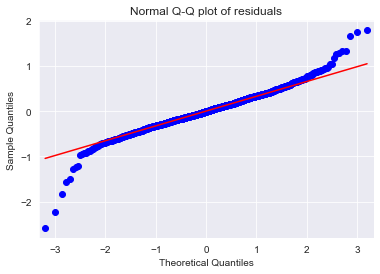

In [269]:
qqplot=sm.qqplot(model_1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [270]:
res = model_1.resid
res.head()

0   -0.912538
1   -0.694059
2   -0.784381
3   -0.403548
4   -0.679206
dtype: float64

In [271]:
res.mean()

1.0336292410447451e-16

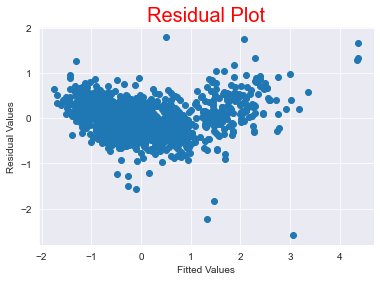

In [272]:
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.title("Residual Plot", size=20, color = "red")
plt.xlabel("Fitted Values")
plt.ylabel("Residual Values")
plt.show()

Observations :-

There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance.

## Residual Vs Regressors

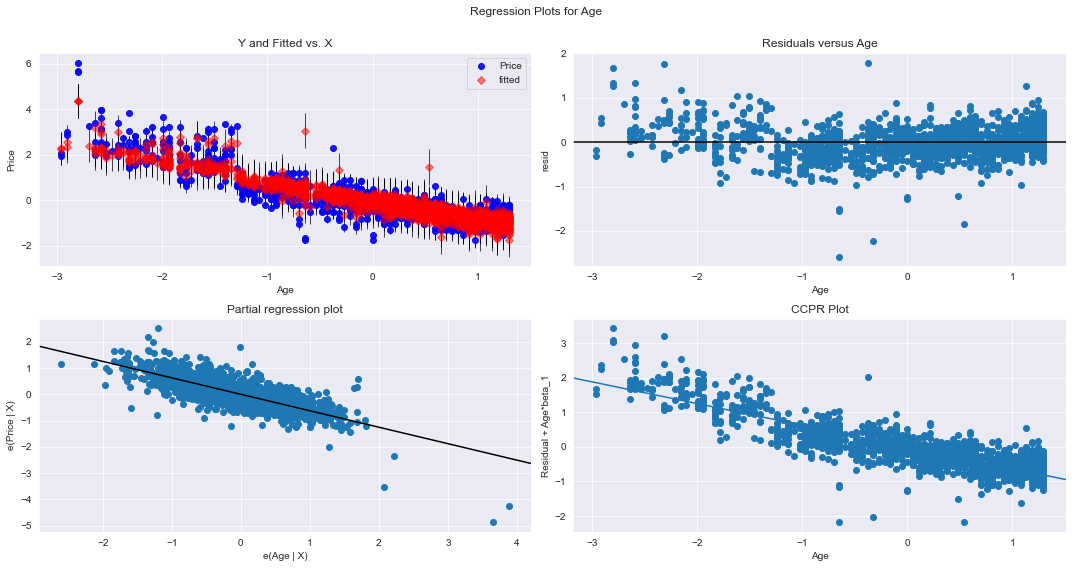

In [273]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Age", fig=fig)
plt.show()

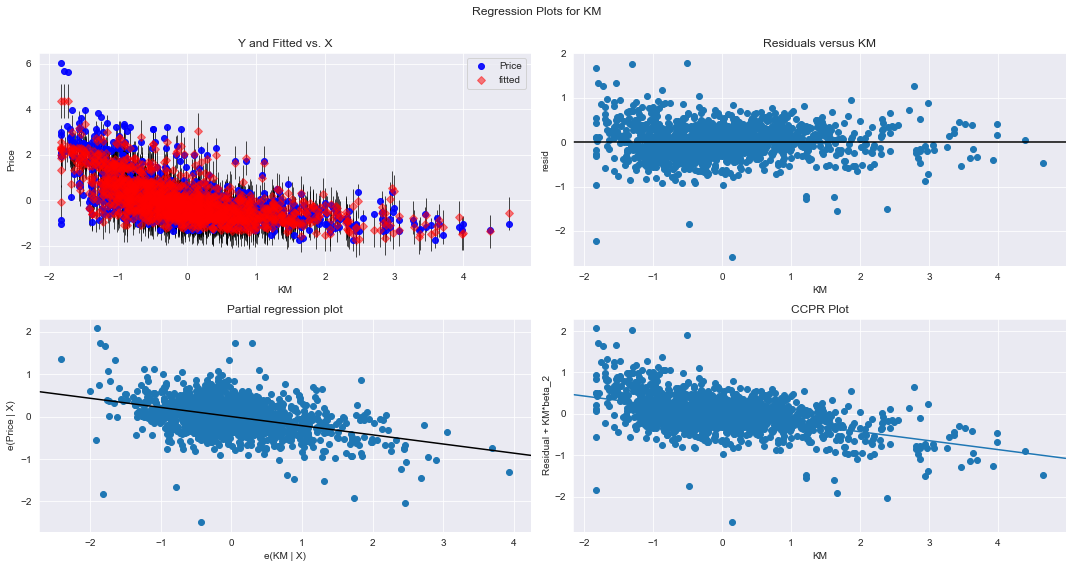

In [274]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "KM", fig=fig)
plt.show()

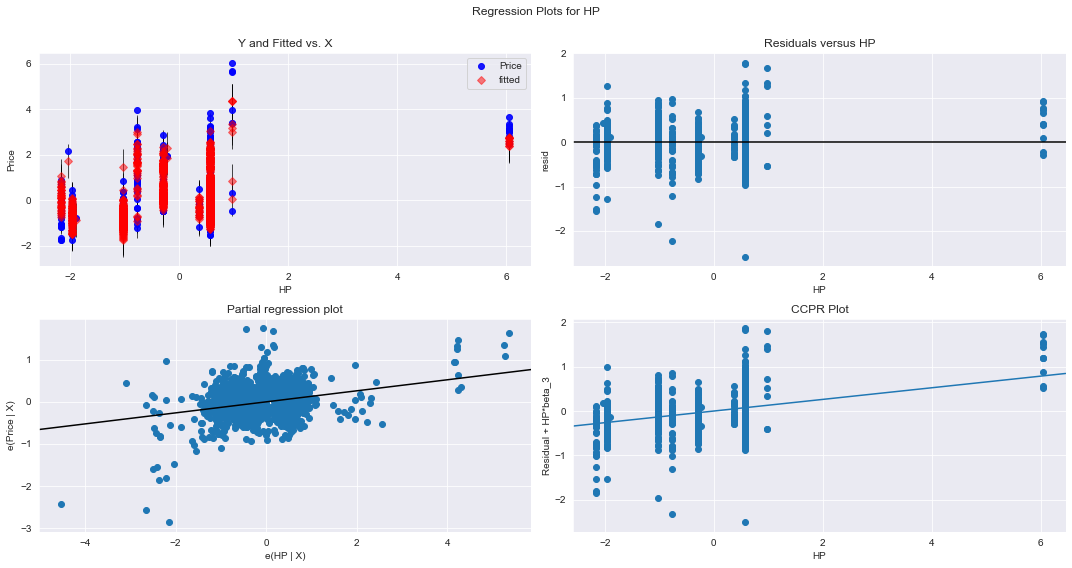

In [275]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "HP", fig=fig)
plt.show()

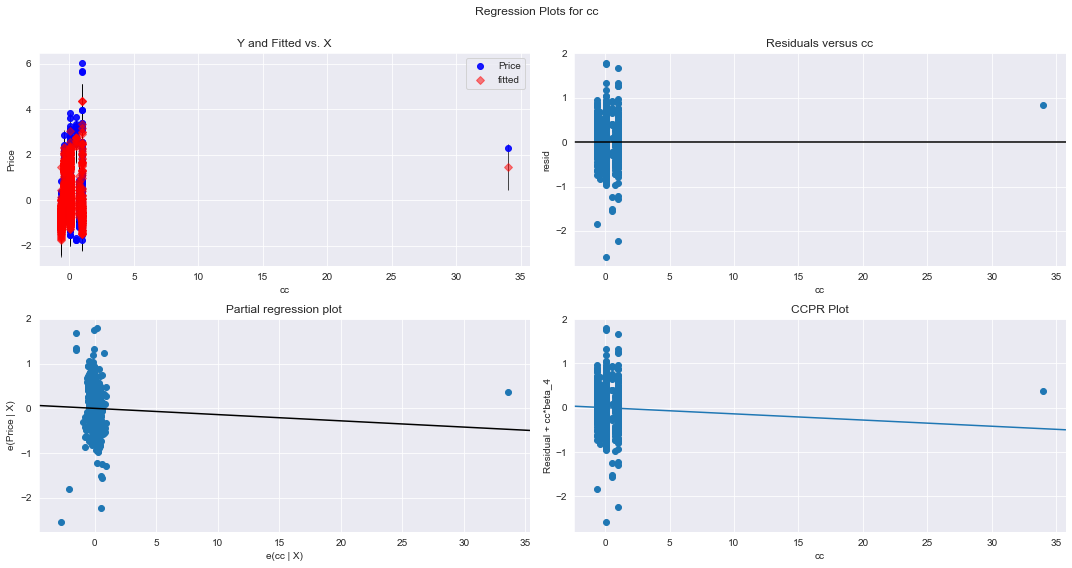

In [276]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "cc", fig=fig)
plt.show()

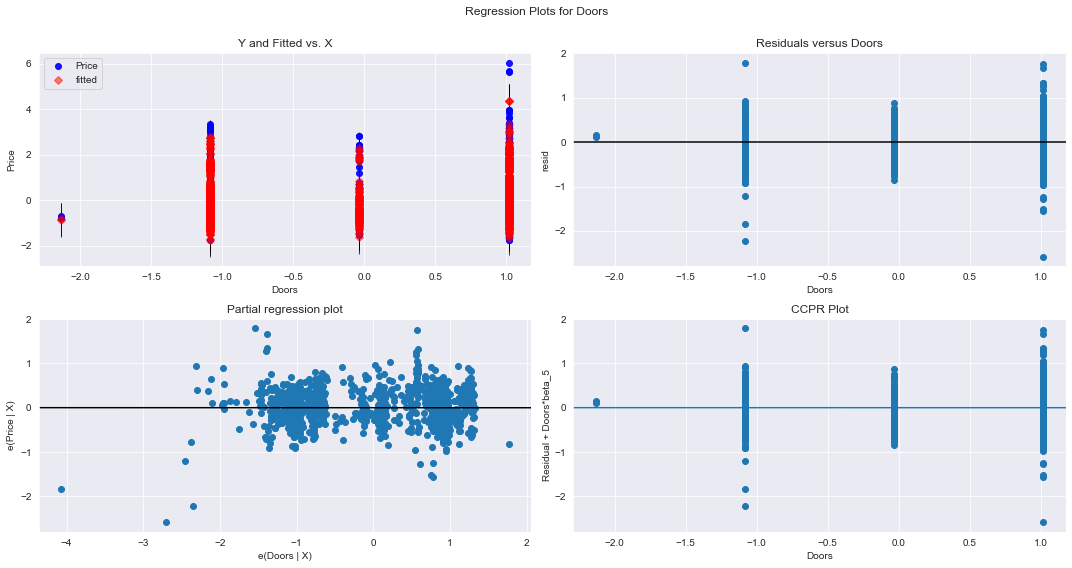

In [277]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Doors", fig=fig)
plt.show()

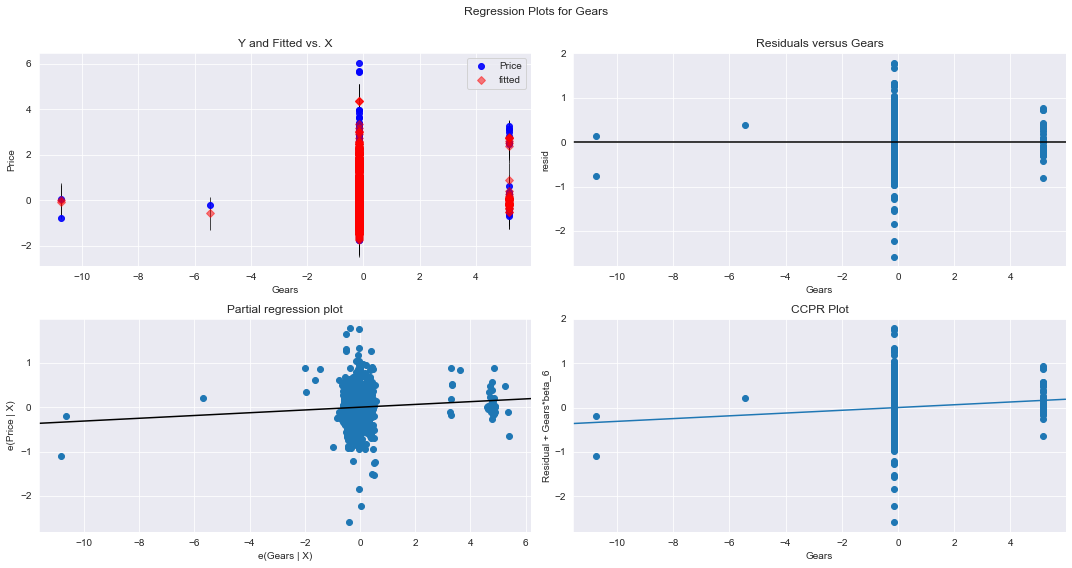

In [278]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Gears", fig=fig)
plt.show()

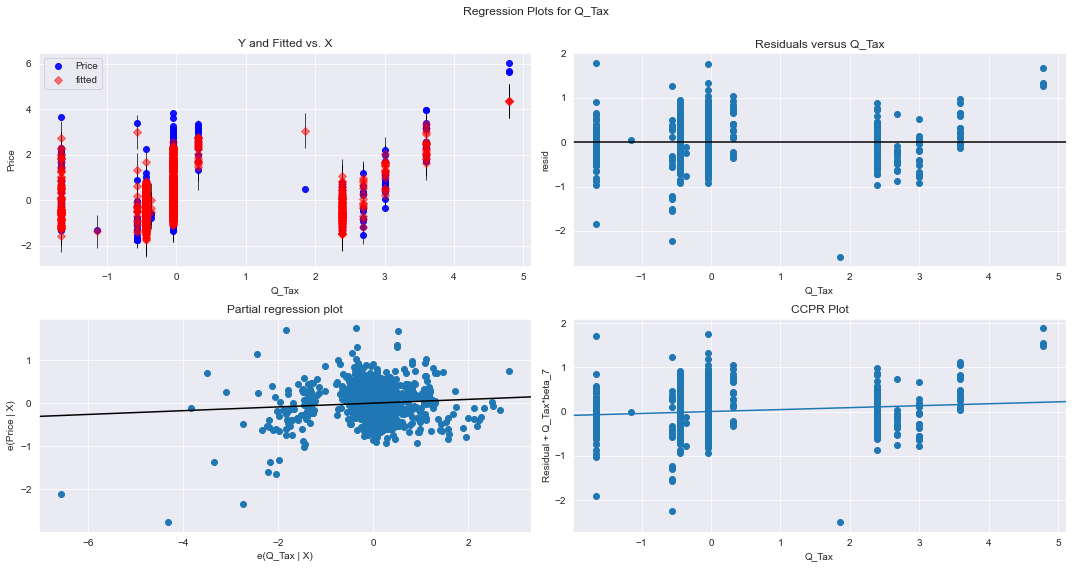

In [279]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Q_Tax", fig=fig)
plt.show()

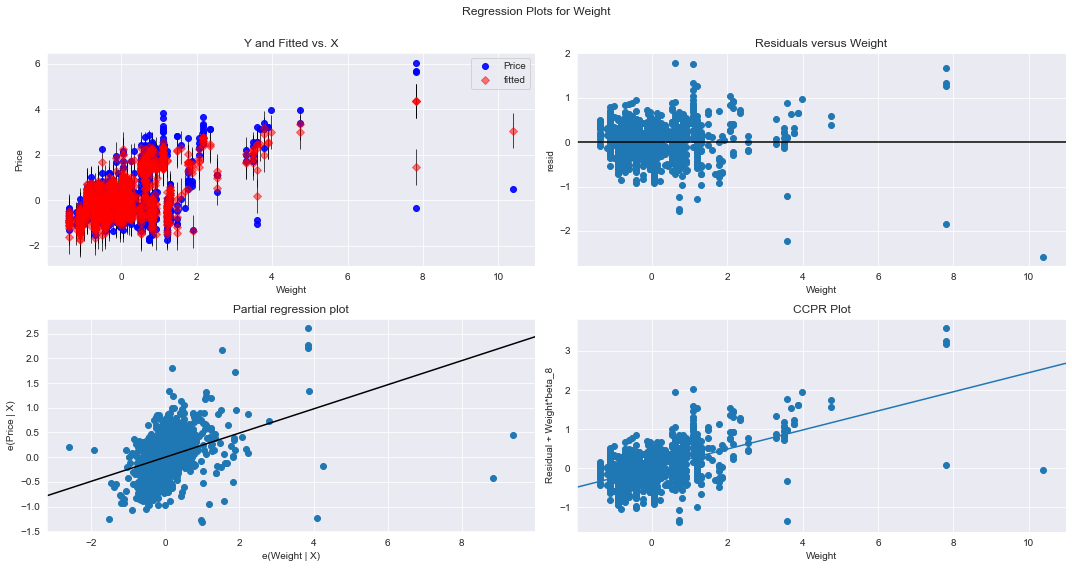

In [280]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers using Cook’s Distance

In [281]:
model_influence = model_1.get_influence()
(c,_) = model_influence.cooks_distance

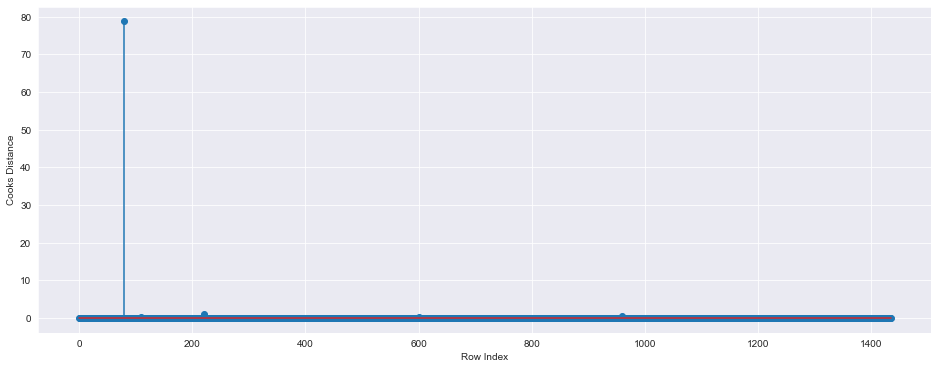

In [282]:
plt.subplots(figsize=(16,6))
plt.stem(np.arange(len(std_data)), np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [283]:
np.argmax(c), np.max(c)

(80, 78.72950582258794)

In [284]:
std_data1 = std_data.drop(std_data.index[80], axis=0).reset_index(drop=True)
std_data1.iloc[78:85, :] 

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
78,1.711470,-1.453937,-1.227300,0.568103,0.055249,1.015659,-0.140475,-0.049339,0.817727
79,1.158451,-1.400049,-1.242642,-0.299942,-0.416182,1.015659,-0.140475,-0.049339,0.722003
80,1.809876,-1.453937,-1.296007,0.568103,0.055249,1.015659,-0.140475,-0.049339,0.817727
81,1.310912,-1.669491,-1.375974,-0.299942,-0.416182,1.015659,-0.140475,-0.049339,0.722003
82,2.003918,-1.346160,-1.396386,0.568103,0.055249,1.015659,-0.140475,0.317003,2.062135
83,1.643555,-1.669491,-1.418372,-0.299942,-0.416182,1.015659,-0.140475,-0.049339,0.722003
84,1.865317,-1.507826,-1.601866,0.568103,0.055249,1.015659,-0.140475,-0.049339,1.104898


## Improving the model

In [285]:
model_1A = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Q_Tax+Weight", data=std_data1).fit()
model_1A.tvalues, model_1A.pvalues

(Intercept    -0.746586
 Age         -47.047842
 KM          -13.931499
 HP           13.470202
 cc           -8.161907
 Doors        -0.675741
 Gears         2.733617
 Q_Tax         6.267655
 Weight       17.943749
 dtype: float64,
 Intercept     4.554364e-01
 Age          2.336818e-292
 KM            1.868674e-41
 HP            5.123463e-39
 cc            7.178158e-16
 Doors         4.993149e-01
 Gears         6.341805e-03
 Q_Tax         4.846286e-10
 Weight        4.509449e-65
 dtype: float64)

In [286]:
model_1A.rsquared, model_1A.aic

(0.8681163912634055, 1178.2542890847349)

In [287]:
model_1A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:44:51   Log-Likelihood:                -580.13
No. Observations:                1434   AIC:                             1178.
Df Residuals:                    1425   BIC:                             1226.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0072      0.010     -0.747      0.455      -0.026       0.012
Age           -0.6199      0.013    -47.048      0.000      -0.646      -0.594
KM            -0.1849      0.013    -13.931      0.000      -0.211      -0.159
HP             0.1628      0.012     13.470      0.000       0.139       0.187
cc            -0.2950      0.036     -8.162      0.000      -0.366      -0.224
Doors         -0.0070      0.010     -0.676      0.499      -0.027       0.013
Gears          0.0275      0.010      2.734      0.006       0.008       0.047
Q_Tax          0.1015      0.016      6.268      0.000       0.070       0.133
Weight         0.2905      0.016     17.944      0.000       0.259       0.322
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                         5.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Again check for influencers

In [288]:
model_influence = model_1A.get_influence()
(c,_) = model_influence.cooks_distance

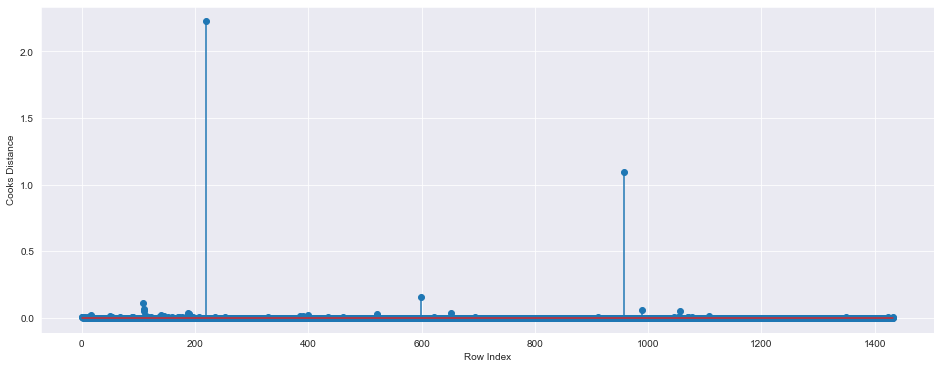

In [289]:
plt.subplots(figsize=(16,6))
plt.stem(np.arange(len(std_data1)), np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [290]:
np.argmax(c), np.max(c)

(219, 2.2253513655267008)

In [291]:
std_data2 = std_data.drop(std_data.index[219], axis=0).reset_index(drop=True)
std_data2.iloc[215:220, :]

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
215,0.770368,-1.238383,0.190171,-2.169577,0.762397,-1.084443,-0.140475,2.392943,0.626280
216,0.063503,-0.807276,0.190117,-0.299942,-0.416182,-1.084443,-0.140475,-0.440104,-0.905299
217,0.063503,-0.645610,0.167411,-0.299942,-0.416182,-1.084443,-0.140475,-0.440104,-0.905299
218,0.617907,-0.968941,0.153349,0.568103,0.055249,1.015659,-0.140475,-0.049339,0.051938
219,0.479306,-0.645610,0.149427,0.568103,0.055249,1.015659,-0.140475,1.855641,10.390096


In [292]:
model_1B = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Q_Tax+Weight", data=std_data2).fit()
model_1B.tvalues, model_1B.pvalues

(Intercept     0.010240
 Age         -46.530322
 KM          -16.534608
 HP           11.211419
 cc           -1.315986
 Doors        -0.012941
 Gears         3.032300
 Q_Tax         2.944251
 Weight       15.746395
 dtype: float64,
 Intercept     9.918312e-01
 Age          3.286700e-288
 KM            2.575385e-56
 HP            5.129019e-28
 cc            1.883903e-01
 Doors         9.896763e-01
 Gears         2.470798e-03
 Q_Tax         3.289839e-03
 Weight        1.257360e-51
 dtype: float64)

In [293]:
model_1B.rsquared, model_1B.aic

(0.8625233857895811, 1242.9109940327717)

In [294]:
model_1B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:44:51   Log-Likelihood:                -612.46
No. Observations:                1434   AIC:                             1243.
Df Residuals:                    1425   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.010      0.010      0.992      -0.019       0.019
Age           -0.6262      0.013    -46.530      0.000      -0.653      -0.600
KM            -0.2153      0.013    -16.535      0.000      -0.241      -0.190
HP             0.1312      0.012     11.211      0.000       0.108       0.154
cc            -0.0139      0.011     -1.316      0.188      -0.035       0.007
Doors         -0.0001      0.011     -0.013      0.990      -0.021       0.021
Gears          0.0312      0.010      3.032      0.002       0.011       0.051
Q_Tax          0.0438      0.015      2.944      0.003       0.015       0.073
Weight         0.2439      0.015     15.746      0.000       0.214       0.274
==============================================================================
Omnibus:                      149.384   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.348
Skew:                          -0.205   Prob(JB):                    4.42e-217
Kurtosis:                       7.063   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Selecting best model based on high R_squared and low AIC value

In [295]:
d2 = {'Models':['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_1A', 'model_1B'], 'R_Square':[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared,model_6.rsquared,model_7.rsquared,model_8.rsquared,model_9.rsquared,model_1A.rsquared,model_1B.rsquared ], 'AIC':[model_1.aic,model_2.aic,model_3.aic,model_4.aic,model_5.aic,model_6.aic,model_7.aic,model_8.aic, model_9.aic,model_1A.aic,model_1B.aic]}
R_square_table = pd.DataFrame(d2)
R_square_table

,Models,R_Square,AIC
0,model_1,0.862520,1242.916075
1,model_2,0.767855,1980.689258
2,model_3,0.324239,3513.955086
3,model_4,0.098680,3927.263975
4,model_5,0.015469,4053.982065
5,model_6,0.033710,4027.145010
6,model_7,0.004074,4070.494877
7,model_8,0.044736,4010.677867
8,model_9,0.331626,3498.182405
9,model_1A,0.868116,1178.254289


Observations :-

Comparing above R-Square and AIC values, "model_1A" has high R-square and low AIC value.

Hence model_1A is the best posiible model for preduicting the Price value.

Also p-value < 0.05

Thus the model is accepted.

### Predicting for new data

In [296]:
new_data=pd.DataFrame({'Age':10,"KM":35000,"HP":75,"cc":1100,"Doors":4,"Gears":5,"Q_Tax":60,"Weight":999},index=[1])

In [302]:
model_1A.predict(-new_data)

1    6494.201882
dtype: float64

## Final prediction for profit of ToyotaCorolla data

In [301]:
model_1A.predict(-data6)

0        8918.309430
1       13717.084984
2        7943.493265
3        9107.674722
4        7351.992330
            ...     
1430     3906.360719
1431     3625.613806
1432     3258.119010
1433     3239.007441
1434      175.790891
Length: 1435, dtype: float64